In [69]:
import requests

ticker = 'INTC'
api_url = 'https://www.quandl.com/api/v3/datasets/WIKI/%s/data.csv?column_index=4&exclude_column_names&&order=asc&rows=10' %ticker
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)

In [72]:
# parse the response text 
rtext=str(raw_data.text).split('\n')[:-1]
data=zip(*[line.split(',') for line in rtext])


In [87]:
# build the dataframe
import pandas as pd

df=pd.DataFrame({'date':pd.to_datetime(data[0]),
                 'price':pd.to_numeric(data[1])})
df['price']=df['price'].astype('float')


In [89]:
df


,date,price
0,1980-03-17,62.50
1,1980-03-18,62.00
2,1980-03-19,63.50
3,1980-03-20,63.25
4,1980-03-21,61.00
5,1980-03-24,59.75
6,1980-03-25,60.00
7,1980-03-26,59.50
8,1980-03-27,57.50
9,1980-03-28,59.75


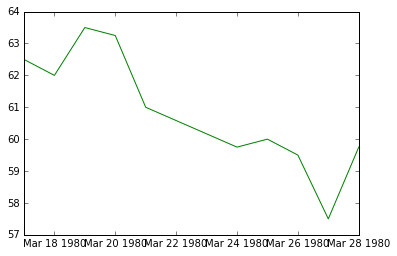

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(df['date'],df['price'],color='green')
